## Кузнецов Илья Александрович, 471 группа
# Задача 1. Линейная регрессия, метод градиентного спуска

In [758]:
%precision 4
import warnings
warnings.filterwarnings('ignore')

Cамостоятельно реализовать функцию gradient_descent(X, y), которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал методом градиентного спуска (Batch Gradient Descent, GD) и возвращая вектор весов w. В качестве функционала можно выбрать, например, функцию ошибок MSE + $L_2$-регуляризатор. Использовать матрично-векторные операции для вычисления градиента.

In [759]:
import numpy as np

np.set_printoptions(precision=4)
np.random.seed(19)

# Добавляем фиктивный признак
def dummy_feature(X: np.ndarray) -> np.ndarray:
    X_copy = X.copy()
    if X.ndim == 1:
        X_copy = X_copy.reshape(-1, 1)
    ones = np.ones((X_copy.shape[0], 1))
    return np.concatenate((ones, X_copy), axis=1)

def linear_model(X: np.ndarray, W: np.ndarray) -> np.ndarray:
    X = dummy_feature(X)
    return np.matmul(X, W)

In [760]:
def gradient_descent(X: np.ndarray, y: np.ndarray, alpha_value=1, lambda_value=1E-2, epsilon_value=1E-4) -> (np.ndarray, list):
    # Число элементов выборки
    m = np.shape(X)[0]
    # Число признаков
    n = np.shape(X)[1]

    X = dummy_feature(X)
    W = np.random.randn(n + 1, )

    cost_history = []
    k = 1
    while True:
        y_estimated = X.dot(W)
        error = y_estimated - y

        regL2 = np.sum(np.square(W[1:]))
        cost = (1 / n) * np.sum(error ** 2) + alpha_value * regL2

        gradient = (1 / k) * (X.T.dot(error) + alpha_value * W)
        lg = lambda_value * gradient
        W = W - lg

        cost_history.append(cost)
        if k >= 2:
            cd = cost_history[k - 1] - cost_history[k - 2]
            # print(k - 1, "cost delta =", cd)

            if (abs(cd) < epsilon_value) or np.all(abs(lg) < epsilon_value):
                return W, cost_history
        k = k + 1

(+2 балла) Также самостоятельно реализовать метод стохастического градиентного спуска (Stochastic Gradient Descent, SGD), обучить модели и добавить их во все сравнения.

In [761]:
def stochastic_gradient_descent(X: np.ndarray, y: np.ndarray, alpha_value=1, lambda_value=1E-2, epsilon_value=1E-4) -> (np.ndarray, list):
    # Число элементов выборки
    m = np.shape(X)[0]
    # Число признаков
    n = np.shape(X)[1]

    X = dummy_feature(X)
    W = np.random.randn(n + 1).reshape(n + 1, 1)

    cost_history = []
    k = 1
    while True:
        random_index = np.random.randint(0, m)

        X_i = X[random_index, :].reshape(1, n + 1)
        y_i = y[random_index].reshape(1, 1)

        y_estimated = X_i.dot(W)
        error = y_estimated - y_i

        regL2 = np.sum(np.square(W[1:]))
        cost = (1 / n) * np.sum(error ** 2) + alpha_value * regL2

        gradient = (X_i.T.dot(error) + alpha_value * W)
        lg = lambda_value * gradient
        W = W - lg

        cost_history.append(cost)
        if k >= 2:
            cd = cost_history[k - 1] - cost_history[k - 2]
            # print(k - 1, "cost delta =", cd)

            if (abs(cd) < epsilon_value) or np.all(abs(lg) < epsilon_value) \
                    or k == 1_000_000:
                return W, cost_history
        k = k + 1

(+2 балла) Также самостоятельно реализовать метод мини-пакетного градиентного спуска (Mini Batch Gradient Descent), обучить модели и добавить их во все сравнения.

Найти данные, на которых интересно будет решать задачу регрессии. Зависимость целевого признака от нецелевых должна быть не слишком сложной, чтобы обученная линейная модель смогла показать приемлемый результат.

### Датасет

Этот набор данных содержит информацию о подержанных автомобилях.

Признаки:
- **name**: название
- **year**: год выпуска
- **km_driven**: пробег в км
- **fuel**: тип топлива
- **seller_type**: тип продавца
- **transmission**: тип трансмиссии
- **owner**: число владельцев

Целевой признак:
- **selling_price**: цена продажи


In [763]:
import pandas as pd

pd.set_option('display.precision', 4)

df = pd.read_csv("../data/cars/cars.csv")

df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).
Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.
При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

In [764]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [765]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Пропущенных значений в данных нет.

Посмотрим на распределение цены.

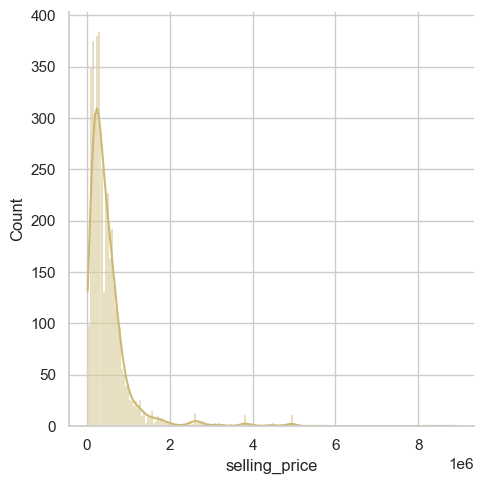

In [766]:
import seaborn as sns

sns.set(style='whitegrid')
ax = sns.displot(x='selling_price', data=df, kde = True, color = 'y')

Исходя из графика, можно сделать вывод, что большая часть машин имеют цену менее 100000. Это сегмент недорогих автомобилей. Дорогих автомобилей продается гораздо меньше.

Информация о владельцах авто.

In [767]:
df['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

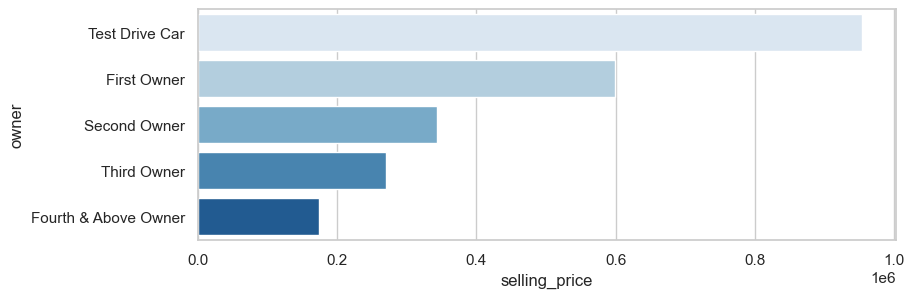

In [768]:
import matplotlib.pyplot as plt
%matplotlib inline

price = df['selling_price'].groupby(df['owner']).mean().sort_values(ascending = False)
f, ax = plt.subplots(1, 1, figsize=(9, 3))
ax = sns.barplot(x=price, y=price.index, palette='Blues')

На графике видно, что цена автомобиля снижается в зависимости от увеличения числа владельцев. Очевидно, машины без владельцев в среднем самые дорогие, а с 4+ владельцами - самые дешевые.

Посмотрим на цены в c учетом типа продавца.

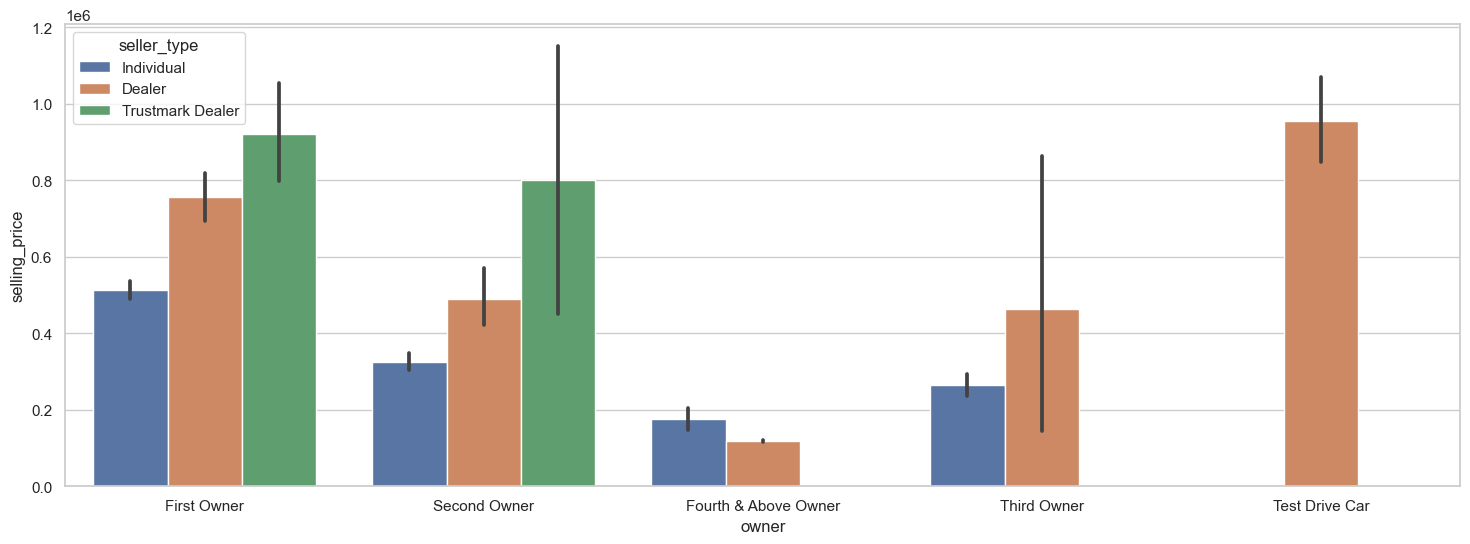

In [769]:
f, ax = plt.subplots(1, 1, figsize=(18, 6))
ax = sns.barplot(x='owner', y='selling_price', hue='seller_type', data=df)

Из графика видно следующее.
- Диллеры продают машины по более высоким ценам, чем индивидуальные продавцы. В случае 1, 2, 3 владельцев автомобиля цены у диллеров выше примерно на 33-100%. Однако в случае 4+ владельцев, цена у диллеров в среднем ниже: это может быть связано с тем, что большая часть авто после использования таким числом владельцев находится в плачевном состоянии, поэтому диллеры не берутся их продавать.
- Официальные диллеры перестают торговать автомобилями с количеством владельцев, больше 2. Они делают ставку на заработок на цене автомобиля, нежели на их количестве.

Посмотрим на цены с учетом типа топлива.

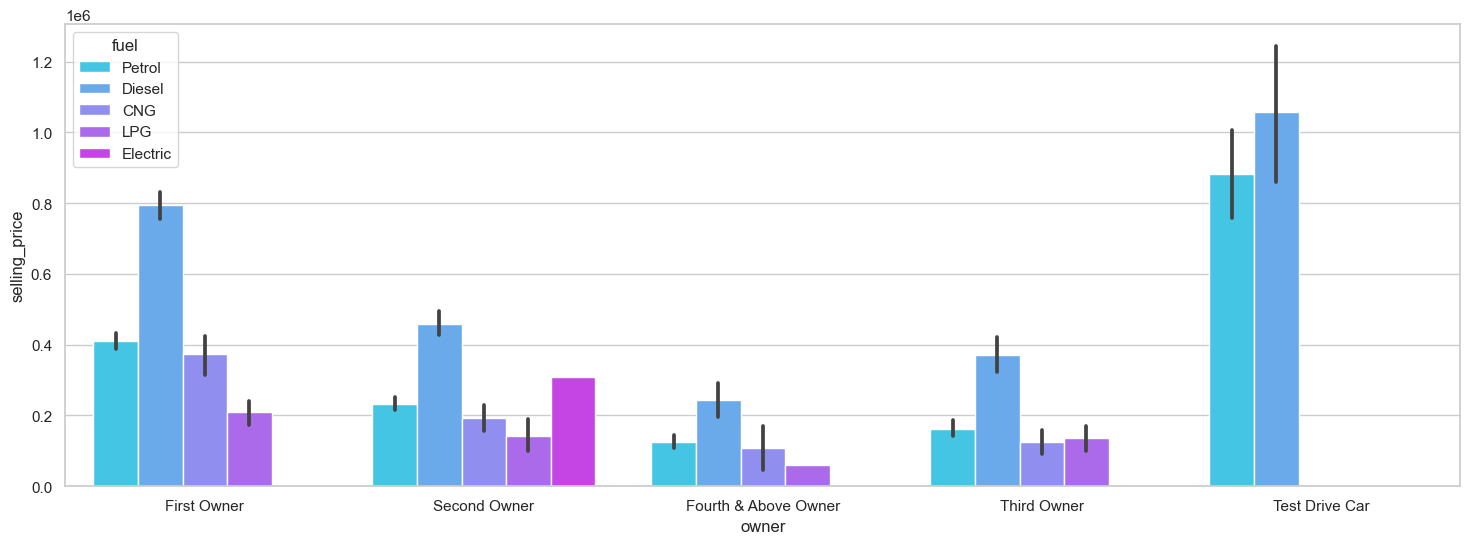

In [770]:
f, ax = plt.subplots(1, 1, figsize=(18, 6))
ax = sns.barplot(x='owner', y='selling_price', hue='fuel', data=df, palette='cool')

Делаем следующие выводы.
- Распределения цен от типов топлива на данном графике примерно одинаковы и сохраняются для любого числа владельцев.
- Автомобили с дизельным топливом всегда самые дорогие, независимо от числа владельцев. Повышение цены связано с дополнительной экономией при использовании такого автомобиля в дальнейшем.
- Электромобили почему-то продаются только после использования 2-мя владельцами, но их цена ожидаемо высокая. Скорее всего, это "выброс" в данной выборке.

Теперь посмотрим на цены с учетом типа трансмиссии.

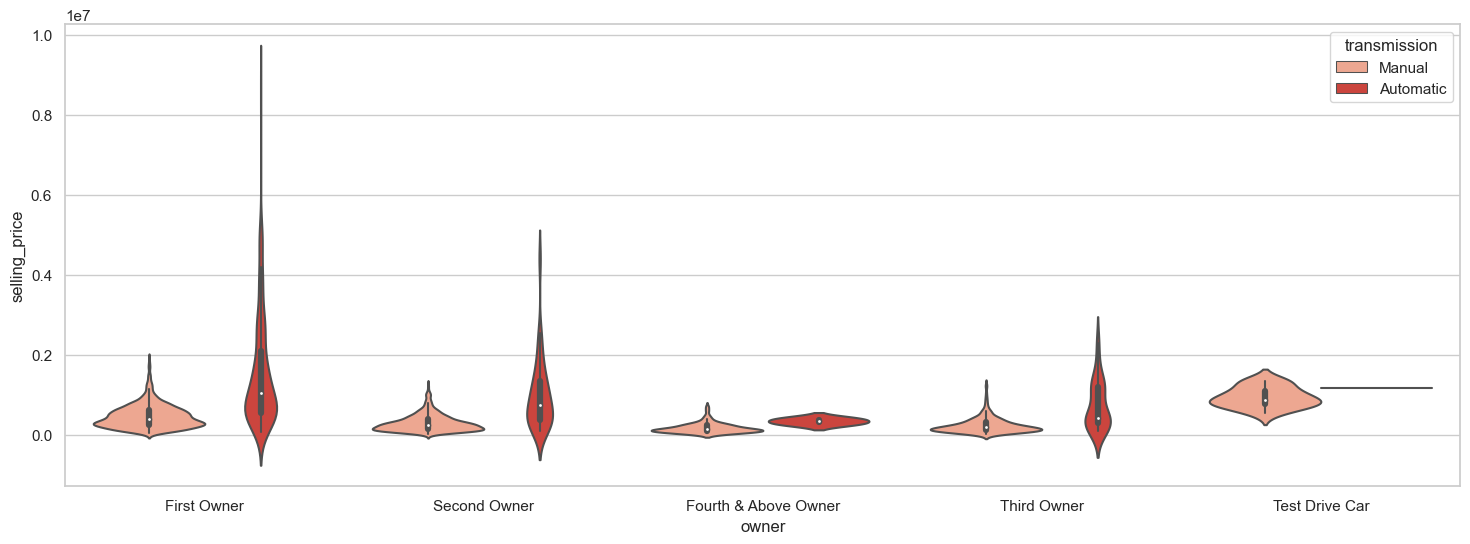

In [771]:
f, ax = plt.subplots(1, 1, figsize=(18, 6))
ax = sns.violinplot(x='owner', y='selling_price', hue='transmission', data=df, palette='Reds')

График достаточно интересный. По нему можно сделать следующие выводы.
- Очевидно, что автоматическая трансмиссия дороже механической во всех случаях.
- Предложений с механической трансмиссией больше во всех случаях.
- Для новых автомобилей цена с механической трансмиссией очевидно ниже, чем с автоматической. В случае 1, 2, 3 владельцев разрыв в стоимости может быть больше, чем в несколько раз. Механика на вторичном рынке часто пользуется меньшей популярностью: автолюбители смотрят предложения с автоматической трансмиссией чаще, так как цена на вторичном рынке бывает более доступная.
- В случае 4+ владельцев разницы между ценой за механику и автомат практически не наблюдается. Это связано с резким падением цен на автомат в данной категории и ростом предложения. Как правило, автоматы с таким числом владельцев находятся в плохом состоянии, что безусловно сказывается на цене и числе продаваемых автомобилей.

Рассмотрим зависимость цены от года выпуска.

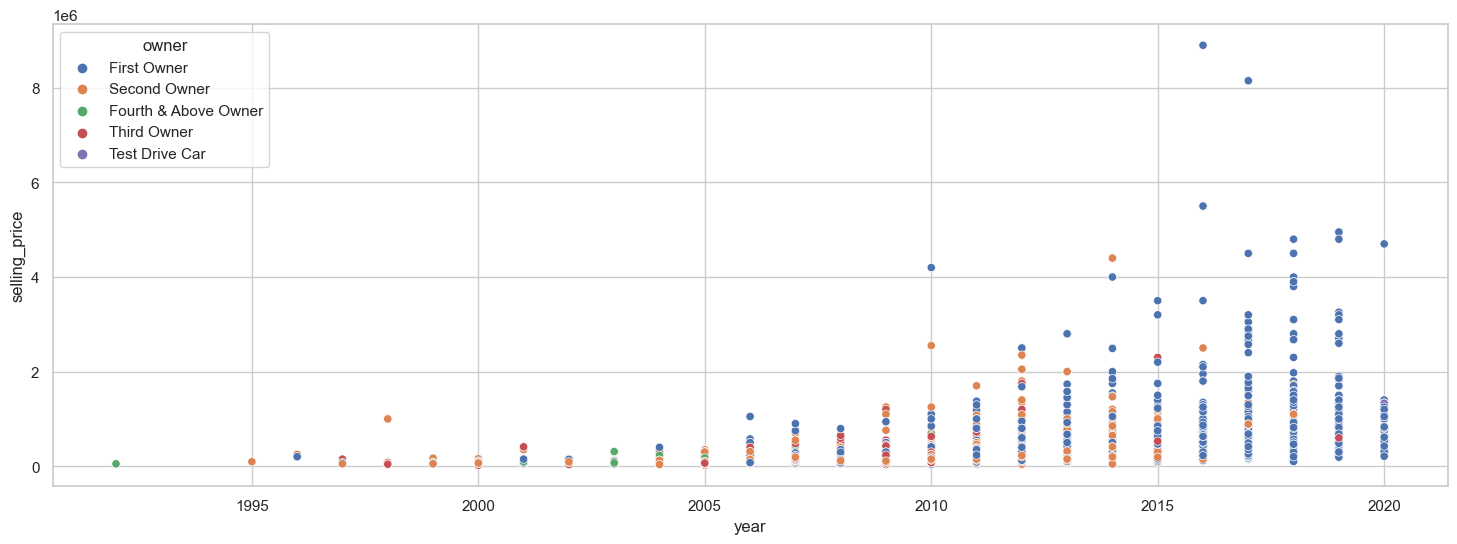

In [772]:
f, ax = plt.subplots(1, 1, figsize=(18, 6))
ax = sns.scatterplot(x = 'year', y = 'selling_price', data=df, hue='owner')

На данном графике наблюдается явная корреляция между признаком года выпуска авто и числом его владельцев. Видно, что оба этих признака оказывают примерно одинаковое влияние на стоимость исходя их смысла этих признаков. Так, автомобили, выпущенные в последние годы, не успели использоваться больше чем 1-2 владельцами, поэтому предыдущие замечания про влияение числа владельцев на стоимость в целом верны и для года выпуска.

Теперь рассмотрим пробег автомобиля и его цену.

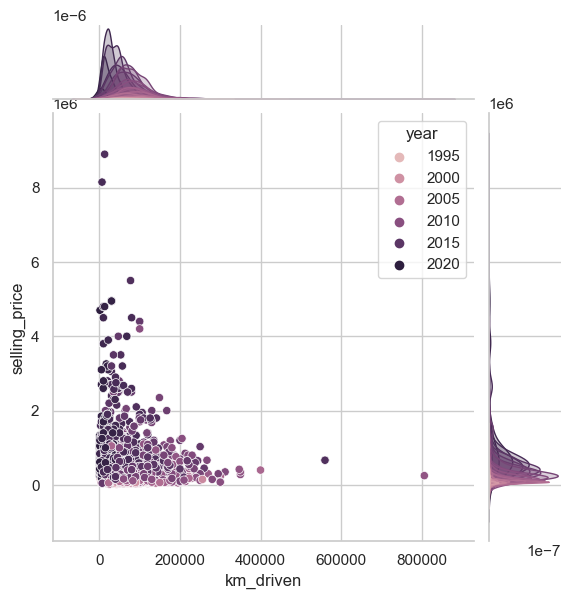

In [773]:
ax = sns.jointplot(x = 'km_driven', y = 'selling_price', data=df, hue='year')

Данный график отражает, что абсолютное большинство автомобилей продается с ценой до 200000 и пробегом до 200000. При этом увеличение пробега снижает цену, а сам пробег явно зависит от года выпуска автомобиля.

Теперь преобразуем категориальные признаки в численные. В данной выборке имеется 4 категориальных признака: **fuel**, **seller_type**, **transmission** и **owner**. Заменим их эквивалентными числами.

In [774]:
df['fuel'].replace(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], [0, 1, 2, 3, 4], inplace=True)
df['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'], [0, 1, 2], inplace=True)
df['transmission'].replace(['Manual', 'Automatic'], [0, 1], inplace=True)
df['owner'].replace(['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car'], [0, 1, 2, 3, 4], inplace=True)

df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,0,0,1
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,0,0,1
4337,Maruti 800 AC BSIII,2009,110000,83000,0,0,0,1
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,0,0,0


Также мы можем убрать из рассмотрения **name**.

In [775]:
df_name = df['name']
df.drop('name', axis=1, inplace=True)

df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,0,0,0,0
1,2007,135000,50000,0,0,0,0
2,2012,600000,100000,1,0,0,0
3,2017,250000,46000,0,0,0,0
4,2014,450000,141000,1,0,0,1
...,...,...,...,...,...,...,...
4335,2014,409999,80000,1,0,0,1
4336,2014,409999,80000,1,0,0,1
4337,2009,110000,83000,0,0,0,1
4338,2016,865000,90000,1,0,0,0


Рассмотрим диаграмму корреляции признаков.

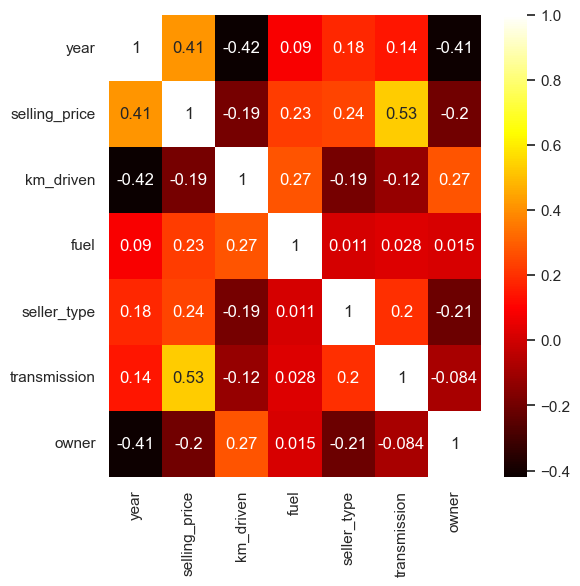

In [776]:
f, ax = plt.subplots(1, 1, figsize=(6, 6))
ax = sns.heatmap(df.corr(), annot=True, cmap='hot')

Выводы.
- Наибольшая корреляция выялена между **selling_price** и **transmission**, что совпадает с предыдущими наблюдениями.
- **selling_price** и **year** также имеют замеченную ранее зависимость.

Случайным образом разбить данные на обучающую и тестовую выборки, используя методы существующих библиотек.

In [777]:
from sklearn.model_selection import train_test_split

x = df.drop(['selling_price'], axis=1)
y = df['selling_price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=19)

При обучении моделей использовать масштабирование данных.

In [778]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

(+1 балл) Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя Recursive Feature Elimination (RFE).

In [779]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=5, scoring='accuracy')
lab = LabelEncoder()

y_transformed = lab.fit_transform(y_train)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x.columns)
rfecv.fit(x_train_scaled_df, y_transformed)

optimal_features = rfecv.n_features_
selected_features = list(x_train_scaled_df.columns[rfecv.support_])

In [780]:
print(f"Optimal number of features = {optimal_features}")
print(f'Selected features = {selected_features}')

Optimal number of features = 6
Selected features = ['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']


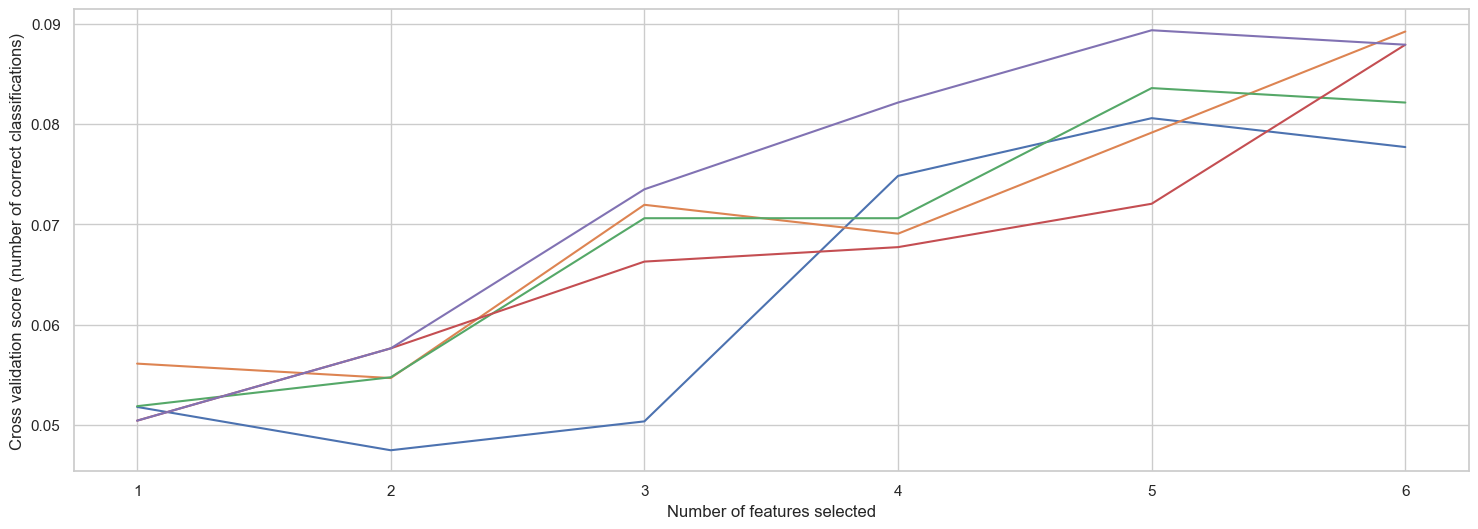

In [781]:
plt.figure(figsize=(18,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (number of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Поиск оптимального числа признаков определил, что для обучения модели стоит использовать все существующие в ней признаки. Значит, количество признаков изменять больше не требуется.

(+1 балл) Во все ваши реализации добавить возможность настройки нужных гиперпараметров, а в процессе обучения всех моделей осуществить подбор оптимальных значений этих гиперпараметров.

In [782]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha_grid = np.logspace(-4, 4, 10)
epsilon_grid = np.logspace(-4, 4, 10)

searcher = GridSearchCV(Ridge(), [{"alpha": alpha_grid, "tol": epsilon_grid}], scoring="neg_root_mean_squared_error", cv=5)
_ = searcher.fit(x_train_scaled, y_train)

In [783]:
optimal_alpha = searcher.best_params_["alpha"]
print(f"Best alpha = {optimal_alpha}")

optimal_epsilon = searcher.best_params_["tol"]
print(f"Best epsilon = {optimal_epsilon}")

Best alpha = 21.54434690031882
Best epsilon = 0.0001


Поиск оптимальных гиперпараметров определил необходимые значения. Будем их использовать при обучении моделей.

Обучить модель на обучающей выборке, используя функцию **gradient_descent(X, y)**. Оценить качество модели на обучающей и тестовой выборках, используя MSE, RMSE и $R^2$.

In [784]:
W, _ = gradient_descent(X=x_train_scaled, y=y_train, alpha_value=optimal_alpha, epsilon_value=optimal_epsilon)

Посмотрим на получившиеся веса **W**.

In [785]:
W

array([499425.6582, 166991.4491, -28387.5445, 110504.2076,  51923.9012,
       264631.8759, -10695.9075])

Обучить модель на обучающей выборке, используя функцию **stochastic_gradient_descent(X, y)**. Оценить качество модели на обучающей и тестовой выборках, используя MSE, RMSE и $R^2$.

In [786]:
W_stochastic, _ = stochastic_gradient_descent(X=x_train_scaled, y=y_train.to_numpy(), alpha_value=optimal_alpha, epsilon_value=optimal_epsilon)

Посмотрим на получившиеся веса **W_stochastic**.

In [787]:
W_stochastic

array([[ 33093.6409],
       [ -6911.5098],
       [  3097.454 ],
       [-18954.6344],
       [ 24811.6374],
       [ 58566.8126],
       [ 14366.551 ]])

Оценим качество получившейся модели **gradient_descent** с оптимальными гиперпараметрами и числом признаков.

In [788]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

y_train_pred_gd = linear_model(x_train_scaled, W)
y_test_pred_gd = linear_model(x_test_scaled, W)

print(f"MSE train = {mean_squared_error(y_train, y_train_pred_gd, squared=True)}")
print(f"MSE test = {mean_squared_error(y_test, y_test_pred_gd, squared=True)}\n")

print(f"RMSE train = {mean_squared_error(y_train, y_train_pred_gd, squared=False)}")
print(f"RMSE test = {mean_squared_error(y_test, y_test_pred_gd, squared=False)}\n")

print(f"MAE train = {mean_absolute_error(y_train, y_train_pred_gd)}")
print(f"MAE test = {mean_absolute_error(y_test, y_test_pred_gd)}\n")

print(f"MAPE train = {mean_absolute_percentage_error(y_train, y_train_pred_gd)}")
print(f"MAPE test = {mean_absolute_percentage_error(y_test, y_test_pred_gd)}\n")

print(f"R^2 train = {r2_score(y_train, y_train_pred_gd)}")
print(f"R^2 test = {r2_score(y_test, y_test_pred_gd)}")

MSE train = 197593760246.99435
MSE test = 145736704258.71677

RMSE train = 444515.1968684472
RMSE test = 381754.7697917038

MAE train = 233503.71160993577
MAE test = 222223.7196908537

MAPE train = 0.7089604698404715
MAPE test = 0.6393351657015002

R^2 train = 0.42903894588386615
R^2 test = 0.49548913627369395


Оценим качество получившейся модели **stochastic_gradient_descent** c оптимальными гиперпараметрами и числом признаков.

In [789]:
y_train_pred_sgd = linear_model(x_train_scaled, W_stochastic)
y_test_pred_sgd = linear_model(x_test_scaled, W_stochastic)

print(f"MSE train = {mean_squared_error(y_train, y_train_pred_sgd, squared=True)}")
print(f"MSE test = {mean_squared_error(y_test, y_test_pred_sgd, squared=True)}\n")

print(f"RMSE train = {mean_squared_error(y_train, y_train_pred_sgd, squared=False)}")
print(f"RMSE test = {mean_squared_error(y_test, y_test_pred_sgd, squared=False)}\n")

print(f"MAE train = {mean_absolute_error(y_train, y_train_pred_sgd)}")
print(f"MAE test = {mean_absolute_error(y_test, y_test_pred_sgd)}\n")

print(f"MAPE train = {mean_absolute_percentage_error(y_train, y_train_pred_sgd)}")
print(f"MAPE test = {mean_absolute_percentage_error(y_test, y_test_pred_sgd)}\n")

print(f"R^2 train = {r2_score(y_train, y_train_pred_sgd)}")
print(f"R^2 test = {r2_score(y_test, y_test_pred_sgd)}")

MSE train = 540365240070.1175
MSE test = 486722506402.99915

RMSE train = 735095.3952175986
RMSE test = 697655.0052877133

MAE train = 470716.5057924114
MAE test = 474596.6979817251

MAPE train = 0.8946530684897595
MAPE test = 0.8962460268485596

R^2 train = -0.5614233298282765
R^2 test = -0.6849344394702988


Обучить модель, используя существующую библиотеку. Например, в sklearn для $L_2$-регуляризатора можно использовать Ridge. Сравнить качество с вашей реализацией.

In [790]:
ridge = Ridge(alpha=optimal_alpha, tol=optimal_epsilon)
_ = ridge.fit(x_train_scaled, y_train)

Оценим качество получившейся модели **ridge** c оптимальными гиперпараметрами и числом признаков.

In [791]:
y_train_pred_ridge = ridge.predict(x_train_scaled)
y_test_pred_ridge = ridge.predict(x_test_scaled)

print(f"MSE train = {mean_squared_error(y_train, y_train_pred_ridge, squared=True)}")
print(f"MSE test = {mean_squared_error(y_test, y_test_pred_ridge, squared=True)}\n")

print(f"RMSE train = {mean_squared_error(y_train, y_train_pred_ridge, squared=False)}")
print(f"RMSE test = {mean_squared_error(y_test, y_test_pred_ridge, squared=False)}\n")

print(f"MAE train = {mean_absolute_error(y_train, y_train_pred_ridge)}")
print(f"MAE test = {mean_absolute_error(y_test, y_test_pred_ridge)}\n")

print(f"MAPE train = {mean_absolute_percentage_error(y_train, y_train_pred_ridge)}")
print(f"MAPE test = {mean_absolute_percentage_error(y_test, y_test_pred_ridge)}\n")

print(f"R^2 train = {r2_score(y_train, y_train_pred_ridge)}")
print(f"R^2 test = {r2_score(y_test, y_test_pred_ridge)}")

MSE train = 197584156317.12808
MSE test = 145795309296.14307

RMSE train = 444504.3940357936
RMSE test = 381831.5195163216

MAE train = 233799.50719851413
MAE test = 222536.5009674121

MAPE train = 0.7101449419261764
MAPE test = 0.6413116204972797

R^2 train = 0.42906669711403267
R^2 test = 0.49528625753973987


Повторить тоже самое, но используя кросс-валидацию.
Создать таблицу, со строками (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) и столбцами (Fold1, Fold2, ..., Foldk, E, STD), где k --- количество фолдов в кросс-валидации, E --- мат. ожидание и STD --- стандартное отклонение. Сделать выводы.

In [792]:
from sklearn.model_selection import KFold

gd_results_df = pd.DataFrame(index=['MSE train', 'MSE test',
                                    'RMSE train', 'RMSE test',
                                    'MAE train', 'MAE test',
                                    'MAPE train', 'MAPE test',
                                    'R2 train', 'R2 test'])
kfold = KFold(n_splits=5)

for fold, (train, test) in enumerate(kfold.split(X=x_train_scaled_df, y=y_train)):
    W, _ = gradient_descent(x_train_scaled_df.iloc[train, :], y_train.iloc[train],
                            alpha_value=optimal_alpha, epsilon_value=optimal_epsilon)

    y_fold_train = linear_model(x_train_scaled_df.iloc[train, :], W)
    y_fold_test = linear_model(x_train_scaled_df.iloc[test, :], W)

    gd_results_df.insert(fold, f"Fold {fold + 1}",
                         [mean_squared_error(y_train.iloc[train], y_fold_train, squared=True),
                          mean_squared_error(y_train.iloc[test], y_fold_test, squared=True),
                          mean_squared_error(y_train.iloc[train], y_fold_train, squared=False),
                          mean_squared_error(y_train.iloc[test], y_fold_test, squared=False),
                          mean_absolute_error(y_train.iloc[train], y_fold_train),
                          mean_absolute_error(y_train.iloc[test], y_fold_test),
                          mean_absolute_percentage_error(y_train.iloc[train], y_fold_train),
                          mean_absolute_percentage_error(y_train.iloc[test], y_fold_test),
                          r2_score(y_train.iloc[train], y_fold_train),
                          r2_score(y_train.iloc[test], y_fold_test)])

mean = gd_results_df.mean(axis=1)
std = gd_results_df.std(axis=1)
gd_results_df["MEAN"] = mean
gd_results_df["STD"] = std

gd_results_df

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,MEAN,STD
MSE train,2.0321e+11,2.1039e+11,1.9463e+11,1.7517e+11,2.0395e+11,1.9747e+11,1.3668e+10
MSE test,1.7565e+11,1.4788e+11,2.1021e+11,2.8770e+11,1.7255e+11,1.9880e+11,5.4430e+10
RMSE train,4.5079e+05,4.5869e+05,4.4117e+05,4.1854e+05,4.5161e+05,4.4416e+05,1.5621e+04
RMSE test,4.1911e+05,3.8455e+05,4.5848e+05,5.3637e+05,4.1539e+05,4.4278e+05,5.8539e+04
MAE train,2.3282e+05,2.3661e+05,2.3449e+05,2.2705e+05,2.3551e+05,2.3330e+05,3.7604e+03
MAE test,2.3150e+05,2.3356e+05,2.2848e+05,2.5534e+05,2.2130e+05,2.3403e+05,1.2784e+04
MAPE train,6.9608e-01,7.1783e-01,7.0729e-01,7.0345e-01,7.1603e-01,7.0814e-01,9.0068e-03
MAPE test,7.4528e-01,7.3270e-01,7.3244e-01,6.8484e-01,6.5205e-01,7.0946e-01,3.9538e-02
R2 train,4.1535e-01,4.3364e-01,4.2628e-01,4.5081e-01,4.2229e-01,4.2967e-01,1.3540e-02
R2 test,4.8338e-01,3.9450e-01,4.3691e-01,3.6560e-01,4.5777e-01,4.2763e-01,4.7560e-02


In [793]:
sgd_results_df = pd.DataFrame(index=['MSE train', 'MSE test',
                                    'RMSE train', 'RMSE test',
                                    'MAE train', 'MAE test',
                                    'MAPE train', 'MAPE test',
                                    'R2 train', 'R2 test'])
kfold = KFold(n_splits=5)

for fold, (train, test) in enumerate(kfold.split(X=x_train_scaled_df, y=y_train)):
    W_stochastic, _ = stochastic_gradient_descent(x_train_scaled_df.iloc[train, :], y_train.iloc[train].to_numpy(),
                            alpha_value=optimal_alpha, epsilon_value=optimal_epsilon)

    y_fold_train = linear_model(x_train_scaled_df.iloc[train, :], W_stochastic)
    y_fold_test = linear_model(x_train_scaled_df.iloc[test, :], W_stochastic)

    sgd_results_df.insert(fold, f"Fold {fold + 1}",
                         [mean_squared_error(y_train.iloc[train], y_fold_train, squared=True),
                          mean_squared_error(y_train.iloc[test], y_fold_test, squared=True),
                          mean_squared_error(y_train.iloc[train], y_fold_train, squared=False),
                          mean_squared_error(y_train.iloc[test], y_fold_test, squared=False),
                          mean_absolute_error(y_train.iloc[train], y_fold_train),
                          mean_absolute_error(y_train.iloc[test], y_fold_test),
                          mean_absolute_percentage_error(y_train.iloc[train], y_fold_train),
                          mean_absolute_percentage_error(y_train.iloc[test], y_fold_test),
                          r2_score(y_train.iloc[train], y_fold_train),
                          r2_score(y_train.iloc[test], y_fold_test)])

mean = sgd_results_df.mean(axis=1)
std = sgd_results_df.std(axis=1)
sgd_results_df["MEAN"] = mean
sgd_results_df["STD"] = std

sgd_results_df

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,MEAN,STD
MSE train,5.6861e+11,6.1894e+11,5.2128e+11,5.0151e+11,4.9225e+11,5.4052e+11,5.2822e+10
MSE test,5.5394e+11,4.7263e+11,5.4503e+11,6.6548e+11,4.6550e+11,5.4052e+11,8.0702e+10
RMSE train,7.5406e+05,7.8673e+05,7.2200e+05,7.0817e+05,7.0160e+05,7.3451e+05,3.5503e+04
RMSE test,7.4427e+05,6.8748e+05,7.3826e+05,8.1577e+05,6.8228e+05,7.3361e+05,5.3963e+04
MAE train,4.8617e+05,4.9308e+05,4.7063e+05,4.6670e+05,4.6246e+05,4.7581e+05,1.3169e+04
MAE test,4.8016e+05,4.7378e+05,4.6044e+05,5.0068e+05,4.6623e+05,4.7626e+05,1.5558e+04
MAPE train,9.8316e-01,9.2533e-01,9.9814e-01,1.0299e+00,1.0995e+00,1.0072e+00,6.4012e-02
MAPE test,9.9101e-01,9.2745e-01,1.0056e+00,1.0175e+00,1.0881e+00,1.0059e+00,5.7576e-02
R2 train,-6.3590e-01,-6.6614e-01,-5.3662e-01,-5.7232e-01,-3.9435e-01,-5.6106e-01,1.0625e-01
R2 test,-6.2921e-01,-9.3521e-01,-4.6001e-01,-4.6743e-01,-4.6282e-01,-5.9093e-01,2.0542e-01


In [794]:
from sklearn.model_selection import cross_val_score

ridge_results_df = pd.DataFrame(index=['MSE train',
                                    'RMSE train',
                                    'MAE train',
                                    'MAPE train',
                                    'R2 train'])

mse_train = cross_val_score(ridge, x_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error")
rmse_train = cross_val_score(ridge, x_train_scaled, y_train, cv=5, scoring="neg_root_mean_squared_error")
mae_train = cross_val_score(ridge, x_train_scaled, y_train, cv=5, scoring="neg_mean_absolute_error")
mape_train = cross_val_score(ridge, x_train_scaled, y_train, cv=5, scoring="neg_mean_absolute_percentage_error")
r2_train = cross_val_score(ridge, x_train_scaled, y_train, cv=5, scoring="r2")

for fold in range(mse_train.size):
    ridge_results_df.insert(fold, f"Fold {fold + 1}", [-mse_train[fold],
                                                       -rmse_train[fold],
                                                       -mae_train[fold],
                                                       -mape_train[fold],
                                                       r2_train[fold]])

mean = ridge_results_df.mean(axis=1)
std = ridge_results_df.std(axis=1)
ridge_results_df["MEAN"] = mean
ridge_results_df["STD"] = std

ridge_results_df

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,MEAN,STD
MSE train,1.7563e+11,1.4807e+11,2.1016e+11,2.8760e+11,1.7245e+11,1.9878e+11,5.4357e+10
RMSE train,4.1908e+05,3.8480e+05,4.5843e+05,5.3628e+05,4.1528e+05,4.4277e+05,5.8454e+04
MAE train,2.3192e+05,2.3396e+05,2.2891e+05,2.5556e+05,2.2169e+05,2.3441e+05,1.2705e+04
MAPE train,7.4671e-01,7.3382e-01,7.3414e-01,6.8587e-01,6.5427e-01,7.1096e-01,3.9312e-02
R2 train,4.8345e-01,3.9372e-01,4.3704e-01,3.6582e-01,4.5807e-01,4.2762e-01,4.7701e-02


Выводы.
- Обученная модель **gradient_descent** имеет точность предсказаний, совпадающую с библиотечной моделью **ridge**, до и после кросс-валидации с оптимальными гиперпараметрами и числом признаков.
- Обученная модель **stochastic_gradient_descent** имеет низкую скорость сходимости, в связи с чем пришлось ограничить число итераций алгоритма и сделать это еще одним параметром, влияющим на точность. Низкая скорость сходимости вызвана рандомизацией выбираемой части данных на каждой итерации алгоритма. По этой причине точность модели оказалась ниже в сравнении с другими предсказателями до и после кросс-валидации с оптимальными гиперпараметрами и числом признаков. Стохастический алгоритм хорошо себя проявляет в условиях неопределенности, однако не очень хорошо подходит для обучения модели на данной выборке.